In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib as mpl

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city and ride data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [5]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Get number of lines for city data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get data types for city data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [9]:
# Get number of lines for ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Get data type for ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

# Technical Analysis Deliverable 1: A Summary DataFrame

In [11]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [12]:
# Change date type to DateTime
pyber_data_df['date']= pd.to_datetime(pyber_data_df['date'])

In [13]:
pyber_data_df.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                float64
driver_count             int64
type                    object
dtype: object

In [14]:
# Get total fares per city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [15]:
# Get total rides per city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [16]:
# Get total drivers per city type
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [17]:
# Get total average fares per ride
average_fare_per_ride = total_fares / total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [18]:
# Get total average fares per driver
average_fare_per_driver = total_fares / total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [19]:
# Assemble into DataFrame.
total_summary_df = pd.DataFrame({'Total Rides' : total_rides,'Total Drivers' : total_drivers, 'Total Fares' : total_fares,'Average Fare per Ride' : average_fare_per_ride,'Average Fare per Driver' : average_fare_per_driver})

total_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [20]:
# Formatting
total_summary_df['Total Rides'] = total_summary_df['Total Rides'].map("{:.0f}".format)

total_summary_df['Total Drivers'] = total_summary_df['Total Drivers'].map("{:,.0f}".format)

total_summary_df['Total Fares'] = total_summary_df['Total Fares'].map("${:,.2f}".format)

total_summary_df['Average Fare per Ride'] = total_summary_df['Average Fare per Ride'].map("${:.2f}".format)

total_summary_df['Average Fare per Driver'] = total_summary_df['Average Fare per Driver'].map("${:.2f}".format)

total_summary_df.index.name = None

total_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57


# Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

In [21]:
# Renaming columns
pyber_data_df = pyber_data_df.rename(columns = {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [22]:
# Dataframe with new columns
pyber_data_df = pyber_data_df.set_index(['Date'])
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:00,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
2019-03-04 18:24:00,South Michelleport,30.24,2.343910e+12,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2019-02-10 23:22:00,Rodneyfort,23.44,5.149250e+12,34,Urban
2019-03-06 04:28:00,South Jack,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:00,Michaelberg,13.38,8.550370e+12,6,Rural
2019-01-30 00:05:00,Lake Latoyabury,20.76,9.018730e+12,2,Rural
2019-02-10 21:03:00,North Jaime,11.11,2.781340e+12,1,Rural


In [23]:
# Create Dataframe only with city type and fares
pyber_data_df_copy = pyber_data_df[['City Type', 'Fare']].copy()
pyber_data_df_copy.head()

,City Type,Fare
Date,,
2019-01-14 10:14:00,Urban,13.83
2019-03-04 18:24:00,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:00,Urban,23.44
2019-03-06 04:28:00,Urban,34.58


In [24]:
# Get Dataframe information
pyber_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [25]:
# Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
total_copy_fares_series = pyber_data_df_copy.groupby(['Date', 'City Type']).sum()['Fare']
total_copy_fares_series

Date                 City Type
2019-01-01 00:08:00  Urban        37.91
2019-01-01 00:46:00  Suburban     47.74
2019-01-01 02:07:00  Suburban     24.07
2019-01-01 03:46:00  Urban         7.57
2019-01-01 05:23:00  Urban        10.75
                                  ...  
2019-05-08 04:20:00  Urban        21.99
2019-05-08 04:39:00  Urban        18.45
2019-05-08 07:29:00  Urban        18.55
2019-05-08 11:38:00  Urban        19.77
2019-05-08 13:10:00  Urban        18.04
Name: Fare, Length: 2364, dtype: float64

In [26]:
# Set City Types as columns
pyber_data_df_copy = pyber_data_df_copy.pivot_table('Fare', ['Date'], 'City Type')
pyber_data_df_copy

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [27]:
# Set data for January to April
date_bins_df = pyber_data_df_copy.loc['1/1/2019' : '4/28/2019']
date_bins_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [28]:
# Get weekly bins of data
weekly_resampled_data = date_bins_df.resample('W').sum()
weekly_resampled_data

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


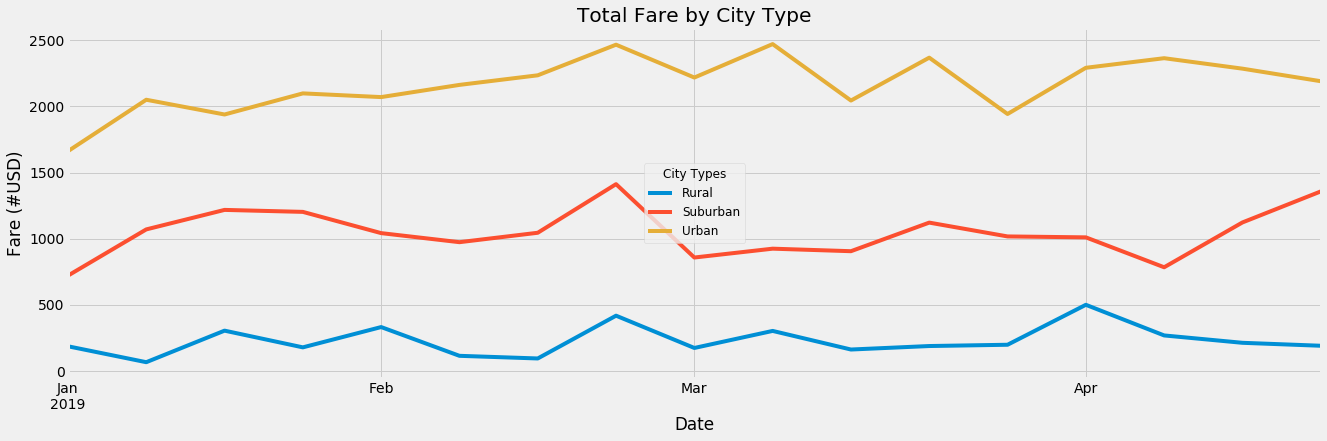

In [30]:
plt.style.use('fivethirtyeight')
ax = weekly_resampled_data.plot(figsize = (20,6))
ax.plot(weekly_resampled_data)
plt.title("Total Fare by City Type")
plt.ylabel("Fare (#USD)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]
lgnd.get_title().set_fontsize(12)
# Save the figure.
plt.savefig("analysis/Total_Fare_by_City_type.png")